In [69]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# LQ Tracking Demo

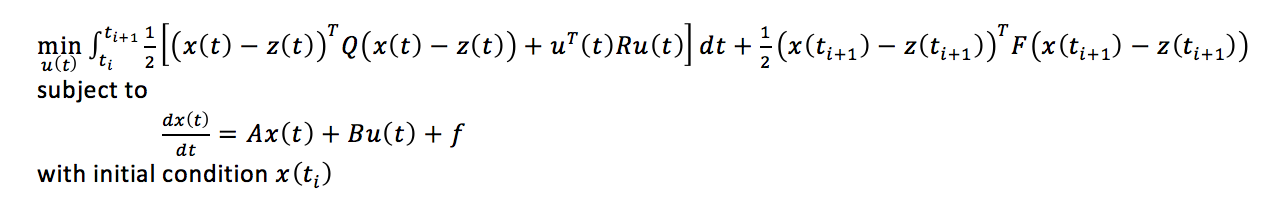

In [63]:
import lqtracker as lqt
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define LQ tracking problem

In [82]:
        stateDim = 3
        controlDim = 2
        dynParA = np.array([[-1.0, 0.1, -0.3], [0.2, -1, 0.1], [0.1, 0.4, -1]])
        dynParB = np.array([[0.5, -0.0001], [-0.0002, 0.6], [0.4, 0.8]])        
        dynParF = np.array([-0.1, -0.02, -0.2])
        trackParQ = np.diag(np.array([100.0,100.0,0.0]))
        trackParR = np.diag(np.array([0.1, 0.1]))
        trackParF = np.diag(np.array([50.0,50.0,0.0]))
        outputNum = 100
        integrateTol = 1e-8
        integrateMaxIter = 10000    


# Set starting and tracking data points, and plot

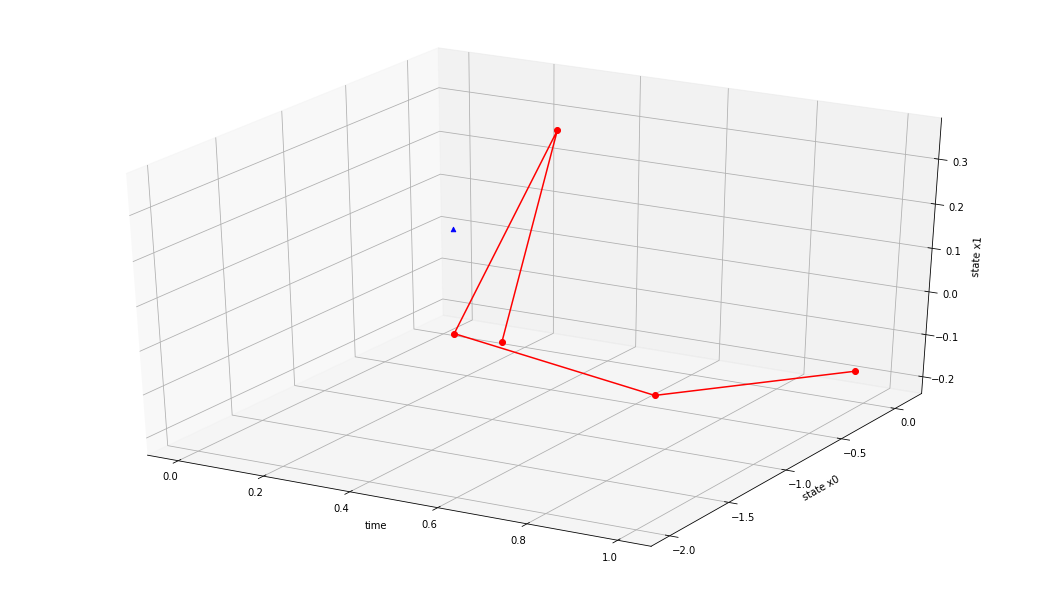

In [83]:
x0 = np.array([0.1,0.0,1.0]) 
zData = np.array([[-0.2, -0.2,  0.8],[-0.45, 0.35,  0.85],[-2.0, 0.13,  -1.8],
                      [-1.1, -0.1,  -1.4],[-0.1, -0.15,  0.3]])

zTimeIndex = np.array([[0.0, 0.2],[0.2,0.4],[0.4,0.6],[0.6,0.8],[0.8,1.0]])

fig = plt.figure()
ax = fig.gca(projection='3d')
fig.set_size_inches(18.5, 10.5)

xs = zTimeIndex[:,1]
ys = zData[:,0]
zs = zData[:,1]

ax.plot(xs, ys, zs, c='r', marker='o')

ax.scatter(zTimeIndex[0,0],x0[0], x0[1], c='b', marker='^')

ax.set_xlabel('time')
ax.set_ylabel('state x0')
ax.set_zlabel('state x1')

    
plt.show()

In [84]:
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

# Solve LQ tracking problem and plot

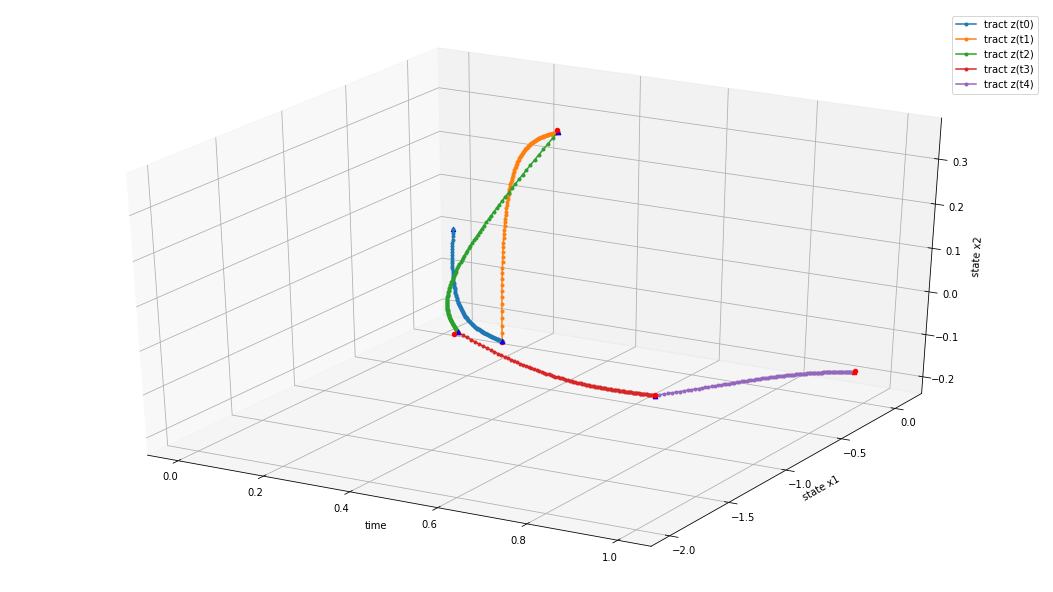

In [87]:
    # call LQ tracker basic (i.e. veriation 1 in Edge Controller doc)
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(18.5, 10.5)
    
    ax.set_xlabel('time')
    ax.set_ylabel('state x1')
    ax.set_zlabel('state x2')

    
    x0 = np.array([0.1,0.0,1.0]) 
    recordControl = pd.DataFrame()
    for i in range(len(zData)):
        t0 = zTimeIndex[i,0]
        t1 = zTimeIndex[i,1]
        zTrack = pd.DataFrame(np.array([zData[i],zData[i]]), index=zTimeIndex[i])
        zTrack.index.names = ['Time']
        lqtOptimalControl, lqtOptimalState = lqt.lqtracker_basic(t0, t1, x0, stateDim, controlDim,  
                                                             zTrack, dynParA, dynParB, 
                                                             dynParF, trackParQ, 
                                                             trackParR, trackParF, outputNum,
                                                             integrateTol, integrateMaxIter)

        recordControl = recordControl.append(lqtOptimalControl)
        ploty0=np.array(lqtOptimalState.index)
        ploty1=lqtOptimalState.values[:,0]
        ploty2=lqtOptimalState.values[:,1]
        ax.plot(ploty0, ploty1, ploty2, label=("tract z(t"+str(i)+")"), marker='.')
        ax.scatter(t1, zTrack.values[1,0], zTrack.values[1,1], c='r', marker='o')
        ax.scatter(t0, x0[0], x0[1], c='b', marker='^')
        ax.scatter(t1, lqtOptimalState.values[-1][0], lqtOptimalState.values[-1][1], c='r', marker='^')
        ax.legend()

        #update x0
        x0 = lqtOptimalState.values[-1]
    plt.show()


# Plot control

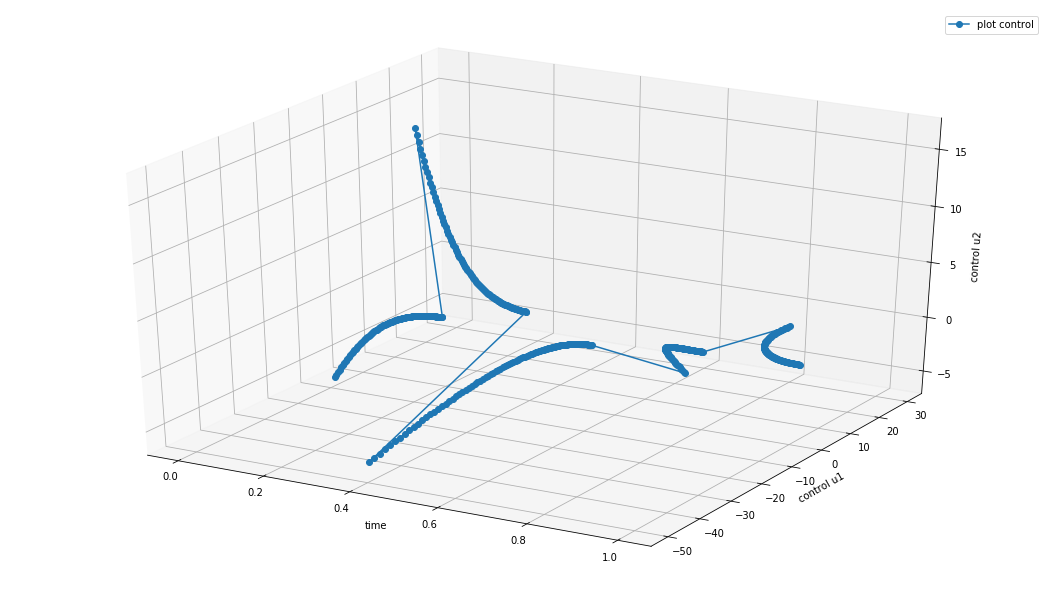

In [86]:
    mpl.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    fig.set_size_inches(18.5, 10.5)
    
    ax.set_xlabel('time')
    ax.set_ylabel('control u1')
    ax.set_zlabel('control u2')
    



    ploty0=np.array(recordControl.index)
    ploty1=recordControl.values[:,0]
    ploty2=recordControl.values[:,1]
    ax.plot(ploty0, ploty1, ploty2, label=("plot control"), marker='o')
    ax.legend()

        
    plt.show()

        
